## セクション３　線形回帰
### 最急降下法をスクラッチで実装する
- 1.データの準備　　　　
- 2.データ可視化　　
- 3.損失関数定義　　
- 4.損失関数可視化　　
- 5.最急降下法　　
- 6.結果を描画　　

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
# １．データの準備
df = pd.read_csv('sample_data.csv')
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


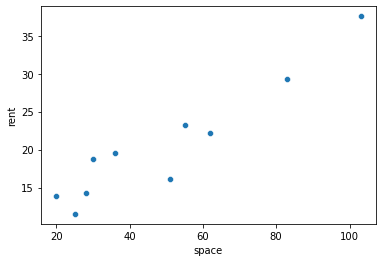

In [6]:
#２.可視化
sns.scatterplot('space','rent',data=df)
plt.show()

In [8]:
df['space'].loc[0]

20

### 3.損失関数の定義

In [11]:

costs =[]
def cost_func(θ0,θ1):
    for i in range(len(df)):
        l =(df['rent'][i] - (θ0 + df['space'][i]*θ1))**2
        costs.append(l)
    cost = np.mean(costs)
    return cost

cost_func(1,1)
 

1236.0308472855227

#### 模範解答

In [15]:
import numpy as np
x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))
cost_func(1,1,x,y)

1236.0308472855227

### ４．損失関数の可視化

### ヒント

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]
[[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]
 [ 40  80 120 160]]


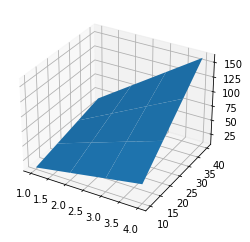

In [39]:
from itertools import product
x = np.array([1,2,3,4])
y = np.array([10,20,30,40])
X,Y = np.meshgrid(x,y)
z = [x*y for x,y in product(x,y)]
Z = np.array(z).reshape(4,4)
print(X)
print(Y)
print(Z)

#3dプロットの描画
ax = plt.axes(projection='3d' )
ax.plot_surface(X,Y,Z)

- 軸の範囲とメモリの数を定義
- 軸の値リストを作成
- それぞれのθの軸の層組み合わせの損失関数の値を計算
- 3d描写

In [57]:
# 軸の値の数
n0 = n1 = 300

# それぞれのパラメータθの最小値と最大値
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値設定
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

x = df['space'].values
y = df['rent'].values
X,Y = np.meshgrid(x,y)

Z = [] 
for i in range(n0):
    z = cost_func(theta_0[i],theta_1[i],X,Y)
    Z.append(Z)


AttributeError: 'list' object has no attribute 'ndim'

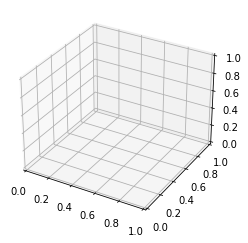

In [58]:
ax = plt.axes(projection='3d' )
ax.plot_surface(X,Y,Z)

### 模範解答

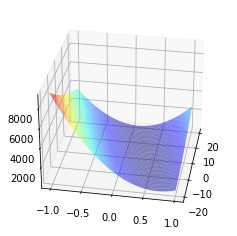

In [59]:
# 軸の値の数
n0 = n1 = 300

# それぞれのパラメータθの最小値と最大値
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値設定
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
# plot_surface用に2次元にする
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
# plot_surface用に2次元にする
Z = np.array(z).reshape(n0, n1)

ax = plt.axes(projection='3d')
# meshgridとproductおよびreshapeの処理がそれぞれ行と列が逆になっているので転置.Tする
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

### 5.最急降下法
- θ0とθ1の初期値設定
- パラメータ更新の関数定義
- イテレーション数や学習率設定
- イテレーションによりθ0と1を更新してその履歴を保存する


In [70]:
# 本来であれば初期値はランダム
# np.random.seed(0)
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(min_1, max_1)

# 描画時にわかりやすいところに初期値を設定
theta_0_init = -5
theta_1_init = -0.5

# パラメータ更新
def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x) 

epochs = 100000
alpha = 0.00005

# パラメータ更新の履歴
theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

# 最急降下法
for _ in range(epochs):
    updated_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta_0)
    theta_1_hist.append(updated_theta_1)

### 結果の描画

In [74]:
# 損失の推移
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

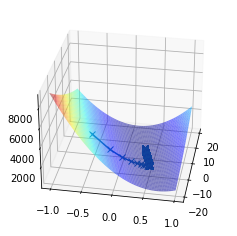

In [76]:
# 3D描画
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0, 0.5, 'theta 0')

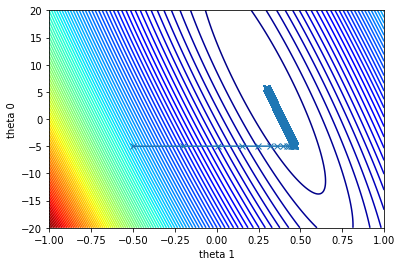

In [77]:
# 等高線
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')
